<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/07-Machine%20Learning/Cloth_Size_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Cloth_Size.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [4]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [5]:
df.dropna(inplace = True)

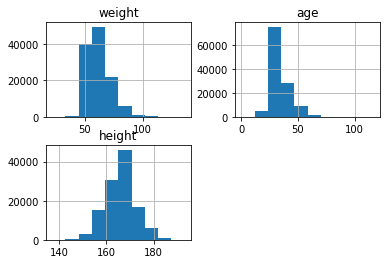

In [7]:
df.hist();

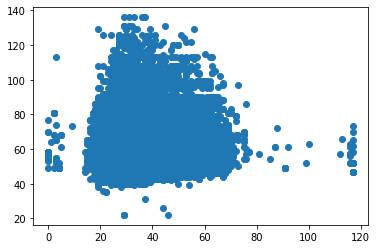

In [8]:
plt.scatter(df.age,df.weight)

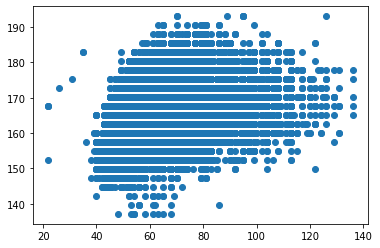

In [9]:
plt.scatter(df.weight,df.height)

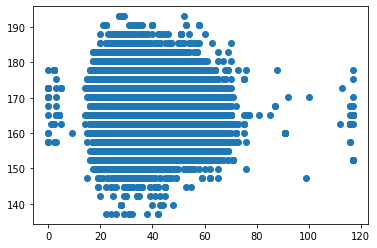

In [10]:
plt.scatter(df.age,df.height)

In [11]:
df = df[ (df.age<100) & (df.weight>30) ]

In [12]:
df.loc[df["size"]=="XL","enc"]   = 15
df.loc[df["size"]=="L","enc"]    = 12
df.loc[df["size"]=="M","enc"]    = 9
df.loc[df["size"]=="S","enc"]    = 4
df.loc[df["size"]=="XXL","enc"]  = 18
df.loc[df["size"]=="XXXL","enc"] = 21
df.loc[df["size"]=="XXS","enc"]  = 1

In [13]:
df.describe()

,weight,age,height,enc
count,119113.000000,119113.000000,119113.000000,119113.000000
mean,61.759615,34.008588,165.807924,10.964597
std,9.940068,8.027445,6.737649,6.233102
min,31.000000,0.000000,137.160000,1.000000
25%,55.000000,29.000000,160.020000,4.000000
50%,61.000000,32.000000,165.100000,9.000000
75%,67.000000,37.000000,170.180000,15.000000
max,136.000000,99.000000,193.040000,21.000000


In [14]:
%who

df	 np	 pd	 plt	 sns	 


In [15]:
df.mode()

,weight,age,height,size,enc
0,58,30.0,162.56,M,9.0


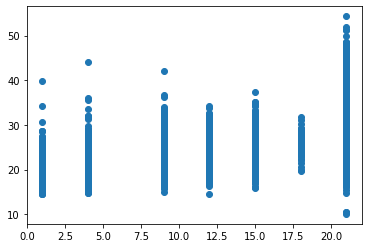

In [17]:
plt.scatter(df.enc,df.weight/((df.height/100)**2))
#interesting observation, BMI doesnt necessarily imply that you have to wear big baggy clothes

In [18]:
df["bmi"] = df.weight/((df.height/100)**2)

In [19]:
df.mean()

weight     61.759615
age        34.008588
height    165.807924
enc        10.964597
bmi        22.461890
dtype: float64

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
csp = RandomForestClassifier(n_estimators=100)

In [22]:
X = df[["weight","age","height","bmi"]]

In [23]:
y = df[["enc"]]

In [24]:
X

,weight,age,height,bmi
0,62,28.0,172.72,20.782914
1,59,36.0,167.64,20.994073
2,61,34.0,165.10,22.378743
3,65,27.0,175.26,21.161563
4,62,45.0,172.72,20.782914
...,...,...,...,...
119729,63,42.0,175.26,20.510438
119730,45,29.0,154.94,18.744999
119731,61,31.0,172.72,20.447705
119732,74,31.0,167.64,26.331549


In [25]:
model = csp.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [26]:
model.predict([[100,18,170,40]])

array([21.])

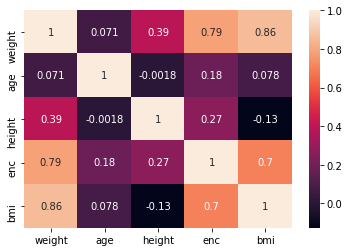

In [27]:
import seaborn as sns
corr = sns.heatmap(df.corr(), annot=True)